# 建立一棵树
## 导入有关模块

In [52]:
from sklearn import tree #导入决策树模型
from sklearn.datasets import load_wine #导入红酒数据集
from sklearn.model_selection import train_test_split #用于划分训练集和测试集
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

## 探索数据集 

In [3]:
wine = load_wine()

In [5]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [17]:
print('数据集大小：')
print(wine.data.shape)
print('标签：')
print(wine.target)
print('标签名称：')
print(wine.target_names)
print('数据集详细信息：')
print(wine.DESCR)
print('特征名称：')
print(wine.feature_names)

数据集大小：
(178, 13)
标签：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
标签名称：
['class_0' 'class_1' 'class_2']
数据集详细信息：
Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
      

所以该数据集有13个特征，共分成三类

In [18]:
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


## 划分训练集和测试集

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3) #划分30%的数据作为测试集
print('训练集大小：' + str(Xtrain.shape))
print('测试集大小：'+ str(Xtest.shape))

训练集大小：(124, 13)
测试集大小：(54, 13)


## 建立模型

In [38]:
clf = tree.DecisionTreeClassifier(criterion='entropy') #建立决策树模型
clf = clf.fit(Xtrain, Ytrain) #拟合训练数据
score = clf.score(Xtest,Ytest) #计算测试集的准确度
print('测试集准确度：' + str(score))

测试集准确度：0.9814814814814815


## 画出决策树

In [39]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf, feature_names=feature_name, class_names=['琴酒','雪莉','贝尔摩德'], filled=None, rounded=None, out_file=None)
graph = graphviz.Source(dot_data) #画树

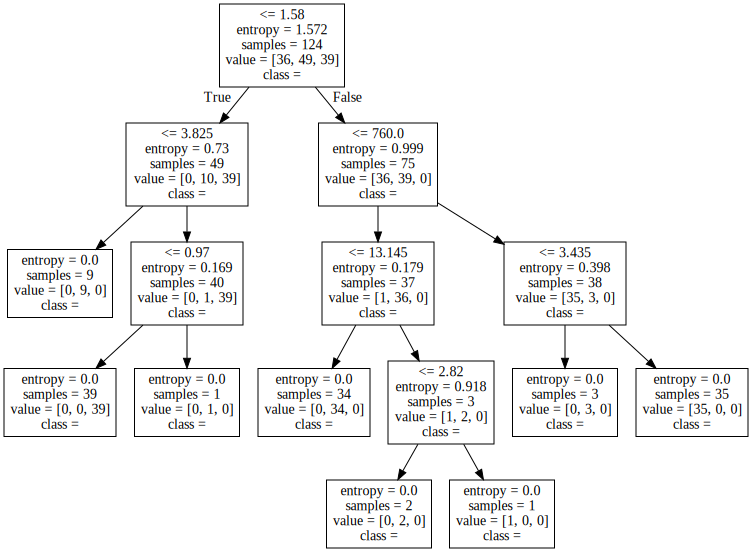

In [40]:
graph

In [30]:
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="类黄酮 <= 1.58\\nentropy = 1.572\\nsamples = 124\\nvalue = [36, 49, 39]\\nclass = 雪莉"] ;\n1 [label="颜色强度 <= 3.825\\nentropy = 0.73\\nsamples = 49\\nvalue = [0, 10, 39]\\nclass = 贝尔摩德"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9, 0]\\nclass = 雪莉"] ;\n1 -> 2 ;\n3 [label="色调 <= 0.97\\nentropy = 0.169\\nsamples = 40\\nvalue = [0, 1, 39]\\nclass = 贝尔摩德"] ;\n1 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 39\\nvalue = [0, 0, 39]\\nclass = 贝尔摩德"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]\\nclass = 雪莉"] ;\n3 -> 5 ;\n6 [label="脯氨酸 <= 760.0\\nentropy = 0.999\\nsamples = 75\\nvalue = [36, 39, 0]\\nclass = 雪莉"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="苹果酸 <= 3.925\\nentropy = 0.179\\nsamples = 37\\nvalue = [1, 36, 0]\\nclass = 雪莉"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 34\\nvalue = [0, 34, 0]\\nclass = 雪莉

## 探索决策树

In [31]:
clf.feature_importances_

array([0.        , 0.03402114, 0.        , 0.        , 0.        ,
       0.        , 0.43224757, 0.        , 0.        , 0.2265477 ,
       0.03460571, 0.        , 0.27257789])

In [32]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0340211384599503),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.43224756760032707),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.22654769710854034),
 ('色调', 0.034605708163339986),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.2725778886678423)]

In [43]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf = clf.fit(Xtrain, Ytrain) #拟合训练数据
score = clf.score(Xtest,Ytest) #计算测试集的准确度
print('测试集准确度：' + str(score))

测试集准确度：0.9444444444444444


# 调参数  random_state & splitter

测试集准确度：0.9444444444444444


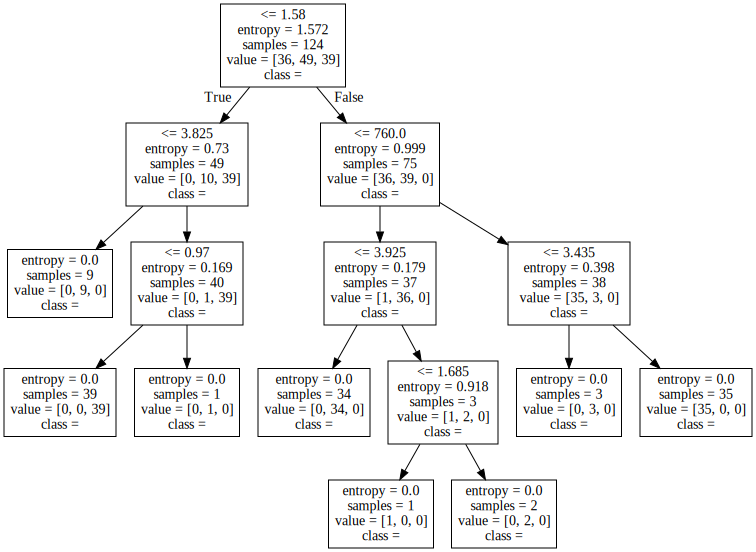

In [47]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30, splitter='best')
clf = clf.fit(Xtrain, Ytrain) #拟合训练数据
score = clf.score(Xtest,Ytest) #计算测试集的准确度
print('测试集准确度：' + str(score))
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf, feature_names=feature_name, class_names=['琴酒','雪莉','贝尔摩德'], filled=None, rounded=None, out_file=None)
graph = graphviz.Source(dot_data) #画树
graph

测试集准确度：0.9074074074074074


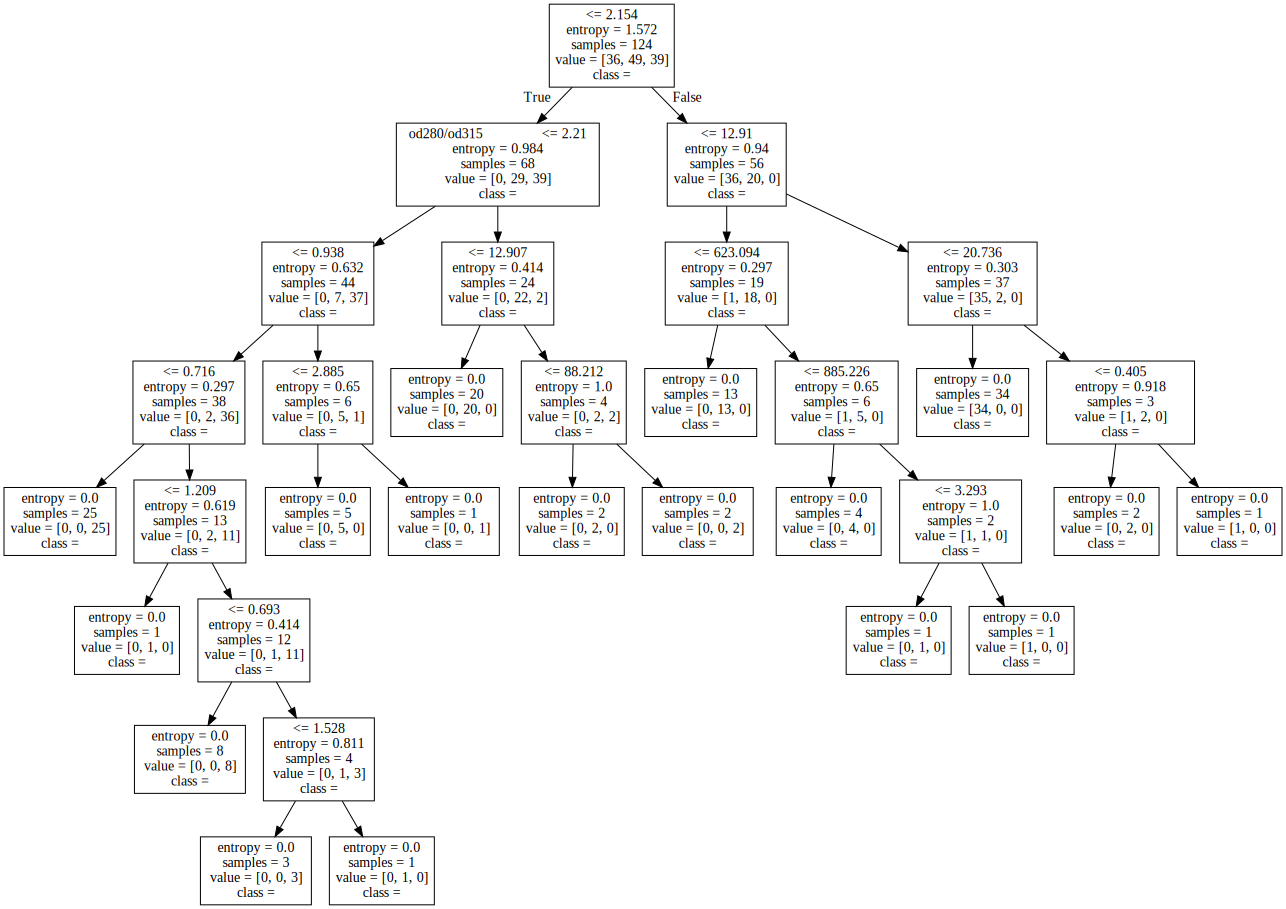

In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30, splitter='random')
clf = clf.fit(Xtrain, Ytrain) #拟合训练数据
score = clf.score(Xtest,Ytest) #计算测试集的准确度
print('测试集准确度：' + str(score))
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf, feature_names=feature_name, class_names=['琴酒','雪莉','贝尔摩德'], filled=None, rounded=None, out_file=None)
graph = graphviz.Source(dot_data) #画树
graph

查看对训练集的拟合情况 

In [49]:
train_score = clf.score(Xtrain, Ytrain)
print(train_score)

1.0


## 剪枝

In [50]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=30
                                  ,splitter='random'
                                  ,max_depth=3
                                  , min_samples_split=10
                                  ,min_samples_leaf=10)
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf, feature_names=feature_name
                                , class_names=['琴酒','雪莉','贝尔摩德'], filled=None
                                , rounded=None, out_file=None)
graph = graphviz.Source(dot_data) #画树
print('训练集精度：' + str(clf.score(Xtrain, Ytrain)))
print('测试集精度：' + str(clf.score(Xtest, Ytest)))

训练集精度：0.8709677419354839
测试集精度：0.9259259259259259


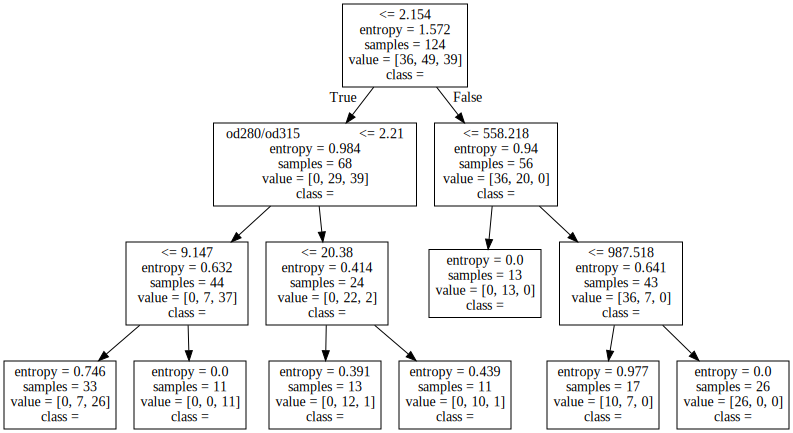

In [51]:
graph

确认最优剪枝参数

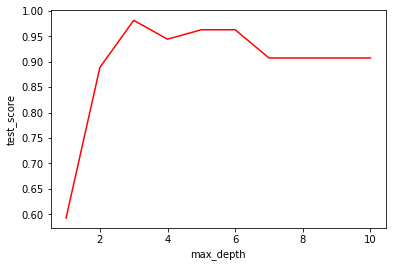

In [65]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i + 1, criterion='entropy', random_state=30, splitter='random')
    clf = clf.fit(Xtrain, Ytrain)
    test.append(clf.score(Xtest,Ytest))
plt.plot(range(1,11), test, color='red')
plt.xlabel('max_depth')
plt.ylabel('test_score')
plt.show()

In [66]:
clf.apply(Xtrain)

array([16,  4,  4, 11, 16, 22, 16, 13,  8,  4, 29, 10,  4, 13, 24,  4,  4,
       16, 29, 22, 22, 13, 31,  4,  4, 22, 29, 29, 29,  8, 29, 29, 29,  4,
       16, 29, 29, 10, 31, 22, 22, 16, 18, 16,  8, 16, 13, 24, 29, 29, 29,
       16,  4,  8, 29, 16, 26, 24, 29, 29, 13, 29, 29,  4,  4, 19, 29, 29,
        8, 14,  4, 29, 16,  4, 32, 24, 22,  8, 29, 16,  4, 27, 29,  4, 29,
       29, 22,  8, 16, 16, 22,  4, 22, 22,  4, 10, 29, 19,  4, 29, 29, 22,
       18, 16, 29,  4, 29,  4, 29, 16,  8, 29,  6,  4, 29, 16,  4, 16, 29,
       16,  4,  4, 22, 16], dtype=int64)

In [67]:
clf.apply(Xtest)

array([22, 13, 16, 29, 16, 29, 29, 16, 29, 29, 29, 29,  4, 24, 19, 29, 29,
       16, 22, 29, 29, 10,  4, 31, 29,  4, 29, 29, 16, 31, 16, 22, 22, 16,
       22, 29, 16, 29, 24,  8, 29, 16, 29, 10, 29, 29,  4,  4, 31, 29,  8,
       10, 16, 29], dtype=int64)